# 전이 학습


- 학습에 필요한 데이터의 양이 충분하지 않아도 사전에 훈련된 딥러닝 모델로 데이터의 일부만 재학습시켜
  원하는 원하는 목적에 필요한 모델을 만들어내는 기술
- 특정 분야에서 학습된 신경망의 일부 능력을 비슷하거나 또는 새로운 분야에서 사용되는 신경망의 학습에
  이용하는 것
- 데이터 증강(Data Augmentation)과 마찬가지로 데이터의 양이 많지 않을 때 효과적으로 사용


## 이미 잘 학습된 모델을 가져와서 파인 튜닝한다

- 옵티마이저의 변경
- BatchNormalization 추가
- Dropout 추가
- resnet50 모델까지 전체 학습 → 구조만 가져오고 전부 학습하는 것을 의미
- Data 전처리 및 증강을 통한 학습데이터 개선
- Fully Connected Layer 은닉층 추가 및 노드 추가
- learning decay를 이용해 유동적인 학습 진행


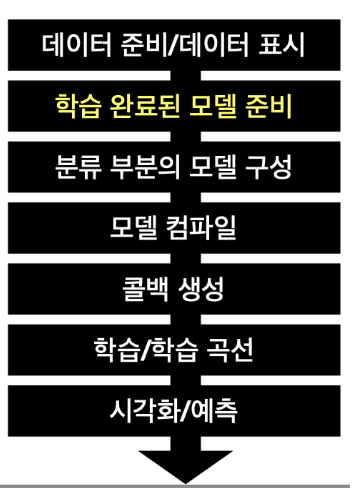


- Fine-tuned ConvNet: 미리 학습된 ConvNet의 마지막 Fully Connected Layer만 변경해 분류 실행
- Pre-trained Model: 미리 학습된 모델의 가중치를 새로운 모델에 적용
- Domain Adaptation: 풍부한 데이터를 바탕으로 훈련 시 **도메인 구분 능력은 약하게 학습**하여 Target
  Data 를 분류가능하도록 모델 구축
- Layer Re-use: 기존 모델의 일부 Layer를 재사용하여 부족 Data Domain 모델 구축에 활용항목 추가


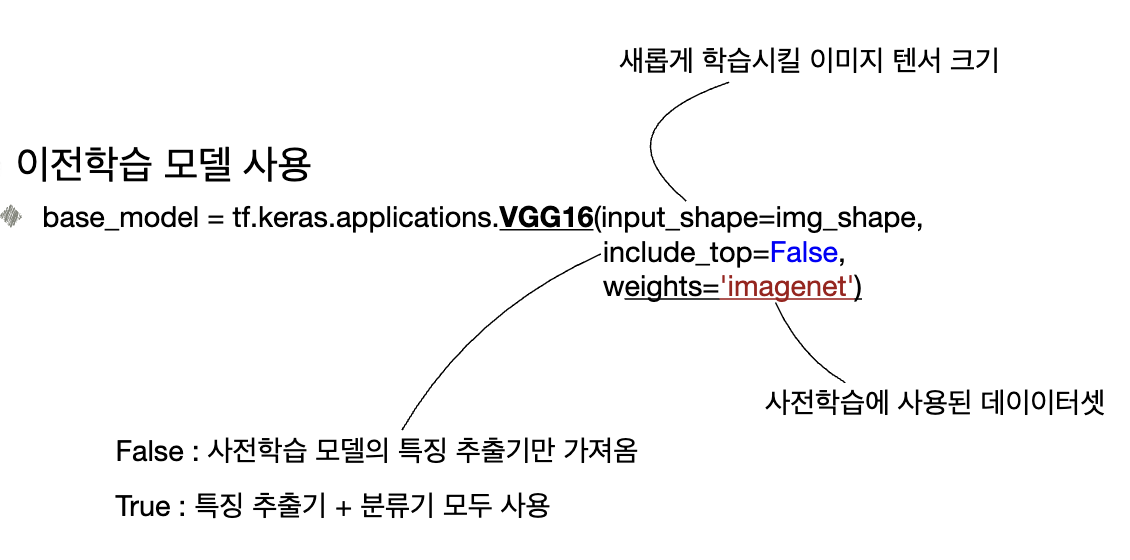


#### 특징 추출기만 가져올건지 분류기까지 가져올껀지


In [3]:
#### Resnet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'berry2.jpeg'
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: [('n02124075', 'Egyptian_cat', 0.41112486), ('n02123597', 'Siamese_cat', 0.32399228), ('n02123045', 'tabby', 0.06014147)]


In [7]:
x.shape

(1, 224, 224, 3)

## cat-dog 전이학습


In [8]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
from tensorflow.keras import models, layers
from tensorflow.keras.applications import mobilenet_v3


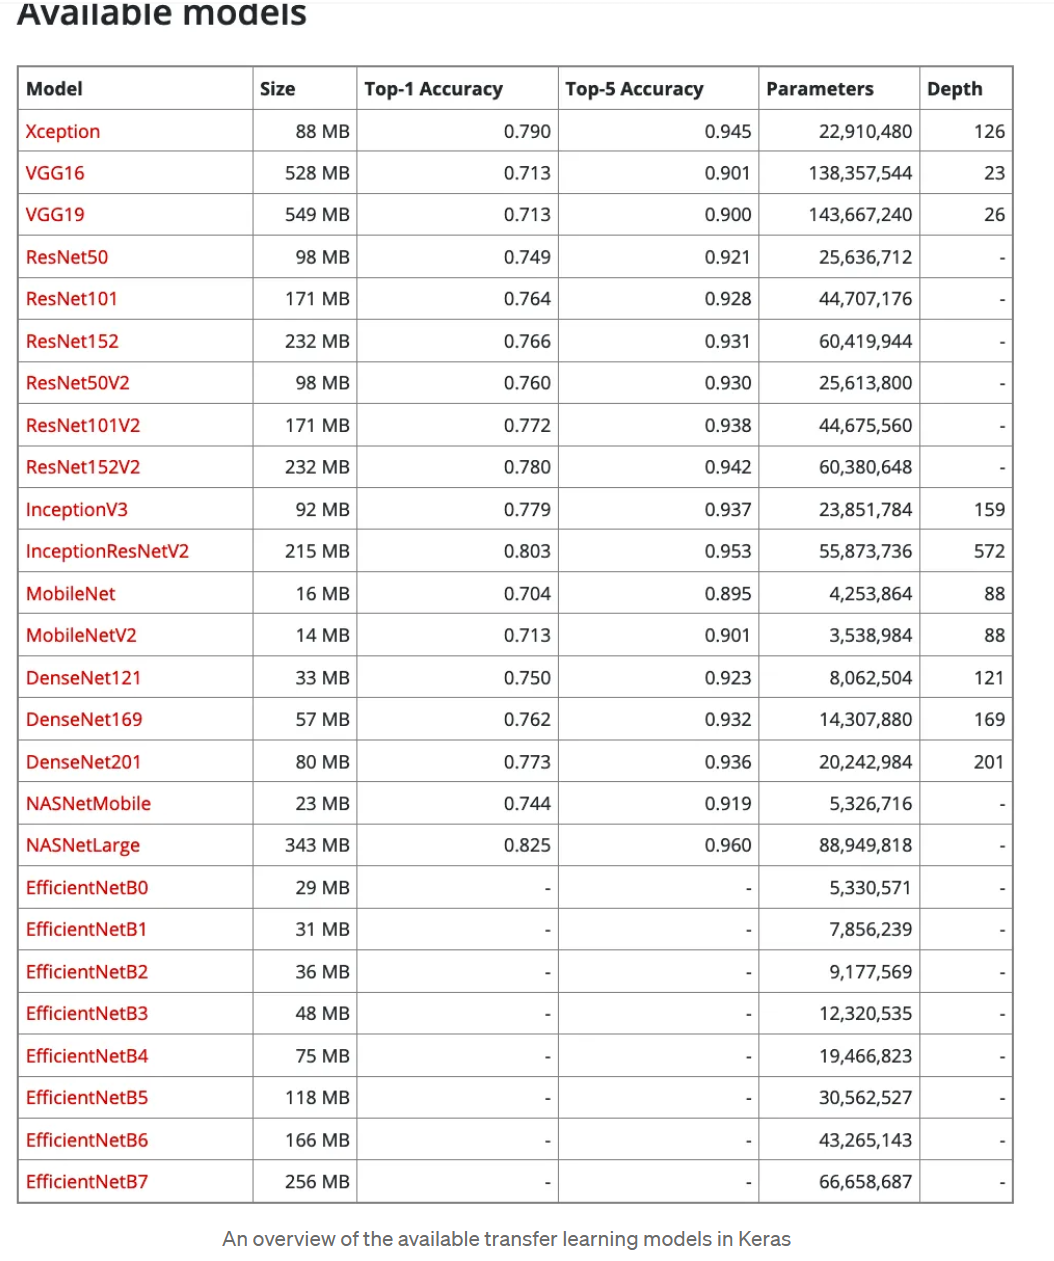


# RNN

- 입력과 출력을 **시퀀스 단위**로 처리
  - 시퀀스란 문장 같은 단어가 나열된 것
  - 이러한 시퀀스들을 처리하기 위해 고안된 모델을 시퀀스 모델
  - 그중에서 RNN은 딥 러닝의 가장 기본적인 시퀀스 모델
- **은닉층에서 활성화 함수를 통해 결과를 내보내는 역할**을 하는 노드를 셀
  - 이 셀은 이전의 값을 기억, 일종의 메모리 역할을 수행(메모리 셀)
  - 은닉층의 메모리 셀에서 나온 값이 다음 은닉층의 메모리 셀에 입력 ➔이 값을 은닉 상태


## RNN 형태

#### 입력, 출력의 개수에 따라 형태 결정

    - 일대일 형태
    - 일대다 형태
    - 단어의 어순이 의미가 있어서 뒤에 오는 단어를 예측하는 문제에 활용가능
    - 다대일 형태
    - 다대다 형태

## RNN 출력

    - 사용자 설정에 따라 두가지 종류로 출력
      - 메모리 셀의 최종 시점의 은닉 상태만을 리턴
      - 메모리 셀의 각 시점의 은닉 상태들을 모두 리턴
    - 각 시점의 모든 은닉 상태를 리턴하려면
      - return sequences 매개 변수를 True로 설정
    - 은닉 상태(h)는
      - 출력 값이 아니라 은닉 상태가 활성화 함수를 지난 것이 출력값


RNN은 Hidden Layer의 노드에서 활성화 함수를 거쳐 나온 결과값을 Output Layer로  
보내면서 다시 다음 Hidden Layer 노드 계산의 입력값으로 보내는 신경망
결과값이 다음 hidden layer 노드의 입력값 계산에 보내지는 것을 ‘순환한다’라고 함

Cell이 값을 기억한다는 것은 이전 time step에서 Hidden Layer의 메모리 셀의  
출력값을 자신의 입력값으로써 재귀적으로(recursively) 사용


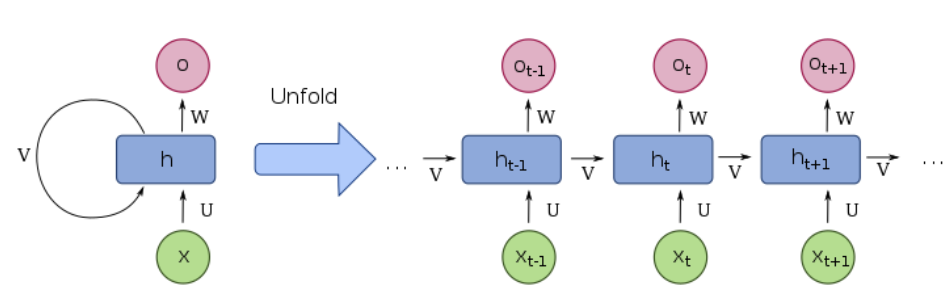


In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional


In [15]:
# 데이터 준비
train_X = [
    [0.1, 4.2, 1.5, 1.1, 2.8],
    [1.0, 3.1, 2.5, 0.7, 1.1],
    [0.3, 2.1, 1.5, 2.1, 0.1],
    [2.2, 1.4, 0.5, 0.9, 1.1]
]
print("Initial shape of train_X:", np.shape(train_X))

train_X = [
    [[0.1, 4.2, 1.5, 1.1, 2.8],
     [1.0, 3.1, 2.5, 0.7, 1.1],
     [0.3, 2.1, 1.5, 2.1, 0.1],
     [2.2, 1.4, 0.5, 0.9, 1.1]]
]
train_X = np.array(train_X, dtype=np.float32)
print("Updated shape of train_X:", train_X.shape)

# SimpleRNN 사용 예제
rnn = SimpleRNN(3, return_sequences=False, return_state=False)
# return_sequences=False: 마지막 시퀀스의 은닉 상태만 출력
# return_state=False: 마지막 시퀀스의 은닉 상태만 출력
hidden_state = rnn(train_X)
print("---------------------", end="\n")
print("Hidden state:", hidden_state)
print("Shape of hidden state:", hidden_state.shape)

rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)
print("Hidden states:", hidden_states)
print("Shape of hidden states:", hidden_states.shape)

rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)
print("---------------------", end="\n")
print("Hidden states:", hidden_states)
print("Shape of hidden states:", hidden_states.shape)
print("Last hidden state:", last_state)
print("Shape of last hidden state:", last_state.shape)

rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)
print("---------------------", end="\n")
print("Hidden state:", hidden_state)
print("Shape of hidden state:", hidden_state.shape)
print("Last hidden state:", last_state)
print("Shape of last hidden state:", last_state.shape)

Initial shape of train_X: (4, 5)
Updated shape of train_X: (1, 4, 5)
---------------------
Hidden state: tf.Tensor([[ 0.9944726   0.5730521  -0.80157584]], shape=(1, 3), dtype=float32)
Shape of hidden state: (1, 3)
Hidden states: tf.Tensor(
[[[-0.9972805  -0.99904877 -0.98635507]
  [-0.988621   -0.99903536 -0.54922974]
  [-0.5567024  -0.9792304  -0.08956899]
  [-0.9687701  -0.9995216  -0.11334112]]], shape=(1, 4, 3), dtype=float32)
Shape of hidden states: (1, 4, 3)
---------------------
Hidden states: tf.Tensor(
[[[-0.9999392  -0.5762268  -0.91968966]
  [-0.9999719  -0.9875124  -0.9890982 ]
  [-0.99955064 -0.5379088  -0.6921772 ]
  [-0.9975857  -0.93573916 -0.9831595 ]]], shape=(1, 4, 3), dtype=float32)
Shape of hidden states: (1, 4, 3)
Last hidden state: tf.Tensor([[-0.9975857  -0.93573916 -0.9831595 ]], shape=(1, 3), dtype=float32)
Shape of last hidden state: (1, 3)
---------------------
Hidden state: tf.Tensor([[ 0.04727077  0.6971272  -0.47079787]], shape=(1, 3), dtype=float32)
Sha

1. return_sequences=False:  
   • 마지막 시점의 은닉 상태만 반환.
   • 출력 차원: (batch_size, units)
2. return_sequences=True:  
   • 각 시점의 은닉 상태를 모두 반환.
   • 출력 차원: (batch_size, time_steps, units)
3. return_state=True:  
   • 마지막 시점의 은닉 상태를 추가로 반환.


In [17]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional 

lstm = LSTM(3, return_sequences=False, return_state=True) 
hidden_state, last_state, last_cell_state = lstm(train_X) 
print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape)) 
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape)) 
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape)) 

stm = LSTM(3, return_sequences=True, return_state=True) 
hidden_states, last_hidden_state, last_cell_state = lstm(train_X) 
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape)) 
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape)) 
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape)) 
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape)) 

rnn = SimpleRNN(3, return_sequences=True, return_state=True) 
hidden_states, last_state = rnn(train_X) 
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape)) 
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape)) 

rnn = SimpleRNN(3, return_sequences=False, return_state=True) 
hidden_state, last_state = rnn(train_X) 
print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape)) 
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape)) 


hidden state : [[ 0.41851923 -0.19037329 -0.16395195]], shape: (1, 3)
last hidden state : [[ 0.41851923 -0.19037329 -0.16395195]], shape: (1, 3)
last cell state : [[ 0.51242757 -1.124646   -0.3119488 ]], shape: (1, 3)
hidden states : [[ 0.41851923 -0.19037329 -0.16395195]], shape: (1, 3)
last hidden state : [[ 0.41851923 -0.19037329 -0.16395195]], shape: (1, 3)
last cell state : [[ 0.51242757 -1.124646   -0.3119488 ]], shape: (1, 3)
hidden states : [[ 0.41851923 -0.19037329 -0.16395195]], shape: (1, 3)
hidden states : [[[ 0.9694479   0.9961387   0.95941204]
  [-0.12252182  0.8584469  -0.07781556]
  [ 0.54579616  0.9724436   0.60452366]
  [ 0.88441837  0.4322709  -0.30437398]]], shape: (1, 4, 3)
last hidden state : [[ 0.88441837  0.4322709  -0.30437398]], shape: (1, 3)
hidden state : [[ 0.979916  -0.0612287  0.6981773]], shape: (1, 3)
last hidden state : [[ 0.979916  -0.0612287  0.6981773]], shape: (1, 3)


# 시계열 데이터 분석


In [21]:
# !pip3 install torch torchvision torchaudio

In [22]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

In [23]:
import torch
print(f"MPS 장치를 지원하도록 build가 되었는가? {torch.backends.mps.is_built()}")
print(f"MPS 장치가 사용 가능한가? {torch.backends.mps.is_available()}") 

MPS 장치를 지원하도록 build가 되었는가? True
MPS 장치가 사용 가능한가? True


In [24]:
device = torch.device("mps")

In [26]:
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])

In [ ]:
from torchvision.datasets import MNIST

download_root = 'MNIST_DATASET/'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

In [35]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_DATASET/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(1.0,))
           )

In [28]:
batch_size = 64
train_loader = DataLoader(dataset=train_dataset,
                         batch_size=batch_size,
                         shuffle=True)
valid_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=True)

In [29]:
batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

In [30]:
class LSTMCell(nn.Module): # LSTMCell 클래스 정의
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias
        self.x2h = nn.Linear(input_size, 4 * hidden_size, bias=bias) # input_size -> 4 * hidden_size
        self.h2h = nn.Linear(hidden_size, 4 * hidden_size, bias=bias) # hidden_size -> 4 * hidden_size
        self.reset_parameters() # 파라미터 초기화

    def reset_parameters(self):
        std = 1.0 / math.sqrt(self.hidden_size) # 표준편차 계산
        for w in self.parameters(): # 파라미터 초기화
            w.data.uniform_(-std, std)

    def forward(self, x, hidden): # forward 함수 정의
        hx, cx = hidden # 앞으로 전진할때 어떻게 할지 정의
        x = x.view(-1, x.size(1))

        gates = self.x2h(x) + self.h2h(hx) # 메모리 셀의 4개의 게이트에 대한 계산
        gates = gates.squeeze()
        ingate, forgetgate, cellgate, outgate = gates.chunk(4, 1)

        ingate = F.sigmoid(ingate) # 활성함수가 무엇으로 쓰였니
        forgetgate = F.sigmoid(forgetgate)
        cellgate = F.tanh(cellgate)
        outgate = F.sigmoid(outgate)

        cy = torch.mul(cx, forgetgate) +  torch.mul(ingate, cellgate) # 메모리 셀의 상태 계산
        hy = torch.mul(outgate, F.tanh(cy))                       # 은닉 상태 계산
        return (hy, cy)

In [31]:
class LSTMModel(nn.Module): # 셀을 합쳐서 모델을 구성
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim

        self.layer_dim = layer_dim
        self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        if torch.cuda.is_available():
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))

        if torch.cuda.is_available():
            c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            c0 = Variable(torch.zeros(self.layer_dim, x.size(0), hidden_dim))

        outs = []
        cn = c0[0,:,:]
        hn = h0[0,:,:]

        for seq in range(x.size(1)):
            hn, cn = self.lstm(x[:,seq,:], (hn,cn))
            outs.append(hn)

        out = outs[-1].squeeze()
        out = self.fc(out)
        return out

In [32]:
input_dim = 28 # 각각 크기 정해주기
hidden_dim = 128
layer_dim = 1
output_dim = 10 # 0~9까지 숫자

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim) # 모델 생성
if torch.cuda.is_available():
    model.cuda()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [33]:
seq_dim = 28
loss_list = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim))
            labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        if torch.cuda.is_available():
            loss.cuda()

        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())
        iter += 1

        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in valid_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1 , seq_dim, input_dim))

                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)

                total += labels.size(0)
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.237457513809204. Accuracy: 21.420000076293945
Iteration: 1000. Loss: 0.9100692868232727. Accuracy: 74.06999969482422
Iteration: 1500. Loss: 0.4141859710216522. Accuracy: 87.98999786376953
Iteration: 2000. Loss: 0.31473594903945923. Accuracy: 91.62999725341797
Iteration: 2500. Loss: 0.09829992055892944. Accuracy: 93.63999938964844
Iteration: 3000. Loss: 0.07892906665802002. Accuracy: 96.4800033569336
Iteration: 3500. Loss: 0.09954178333282471. Accuracy: 96.30999755859375
Iteration: 4000. Loss: 0.013582933694124222. Accuracy: 97.12000274658203
Iteration: 4500. Loss: 0.05706917867064476. Accuracy: 97.12999725341797
Iteration: 5000. Loss: 0.08537448197603226. Accuracy: 97.27999877929688
Iteration: 5500. Loss: 0.0972917452454567. Accuracy: 97.05000305175781
Iteration: 6000. Loss: 0.026007307693362236. Accuracy: 97.81999969482422
Iteration: 6500. Loss: 0.021794160827994347. Accuracy: 97.62999725341797
Iteration: 7000. Loss: 0.06000397726893425. Accuracy: 97.8600006103

In [44]:
def evaluate(model, val_iter):
    corrects, total, total_loss = 0, 0, 0
    model.eval()
    for images, labels in val_iter:
        # if torch.cuda.is_available():
        #     images = Variable(images.view(-1, seq_dim, input_dim).cuda())
        # else:
        images = Variable(images.view(-1 , seq_dim, input_dim))
        labels = labels
        logit = model(images)
        loss = F.cross_entropy(logit, labels, reduction = "sum")
        _, predicted = torch.max(logit.data, 1)
        total += labels.size(0)
        total_loss += loss.item()
        corrects += (predicted == labels).sum()

    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    return avg_loss, avg_accuracy

In [45]:
test_loss, test_acc = evaluate(model,test_loader)
print("Test Loss: %5.2f | Test Accuracy: %5.2f" % (test_loss, test_acc))

Test Loss:  0.06 | Test Accuracy:  0.98


In [25]:
# LSTM 계층

In [46]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [49]:
data = pd.read_csv('data/SBUX.csv')
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [50]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [51]:
data['Volume'] = data['Volume'].astype(float)

In [52]:
X=data.iloc[:,:-1]
y=data.iloc[:,5:6]
print(X)
print(y)

                  Open        High        Low      Close  Adj Close
Date                                                               
1992-06-26    0.328125    0.347656   0.320313   0.335938   0.264262
1992-06-29    0.339844    0.367188   0.332031   0.359375   0.282698
1992-06-30    0.367188    0.371094   0.343750   0.347656   0.273479
1992-07-01    0.351563    0.359375   0.339844   0.355469   0.279625
1992-07-02    0.359375    0.359375   0.347656   0.355469   0.279625
...                ...         ...        ...        ...        ...
2023-11-29  101.510002  101.690002  99.529999  99.849998  99.849998
2023-11-30  100.059998  100.120003  98.419998  99.300003  99.300003
2023-12-01   98.500000   99.279999  97.519997  99.199997  99.199997
2023-12-04   98.389999   98.879997  96.769997  97.599998  97.599998
2023-12-05   97.379997   97.480003  94.849998  95.540001  95.540001

[7919 rows x 5 columns]
                 Volume
Date                   
1992-06-26  224358400.0
1992-06-29   587328

In [53]:
ms = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y)

X_train = X_ss[:200, :]
X_test = X_ss[200:, :]

y_train = y_ms[:200, :]
y_test = y_ms[200:, :]

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

Training Shape (200, 5) (200, 1)
Testing Shape (7719, 5) (7719, 1)


In [54]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape)

Training Shape torch.Size([200, 1, 5]) torch.Size([200, 1])
Testing Shape torch.Size([7719, 1, 5]) torch.Size([7719, 1])


In [55]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True)
        self.fc_1 =  nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128, num_classes)

        self.relu = nn.ReLU()

    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        output, (hn, cn) = self.lstm(x, (h_0, c_0))
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

In [56]:
num_epochs = 1000
learning_rate = 0.0001

input_size = 5
hidden_size = 2
num_layers = 1

num_classes = 1
model = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [57]:
for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.03447
Epoch: 100, loss: 0.00098
Epoch: 200, loss: 0.00090
Epoch: 300, loss: 0.00090
Epoch: 400, loss: 0.00090
Epoch: 500, loss: 0.00090
Epoch: 600, loss: 0.00090
Epoch: 700, loss: 0.00090
Epoch: 800, loss: 0.00090
Epoch: 900, loss: 0.00090


In [58]:
df_x_ss = ss.transform(data.iloc[:, :-1])
df_y_ms = ms.transform(data.iloc[:, -1:])

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

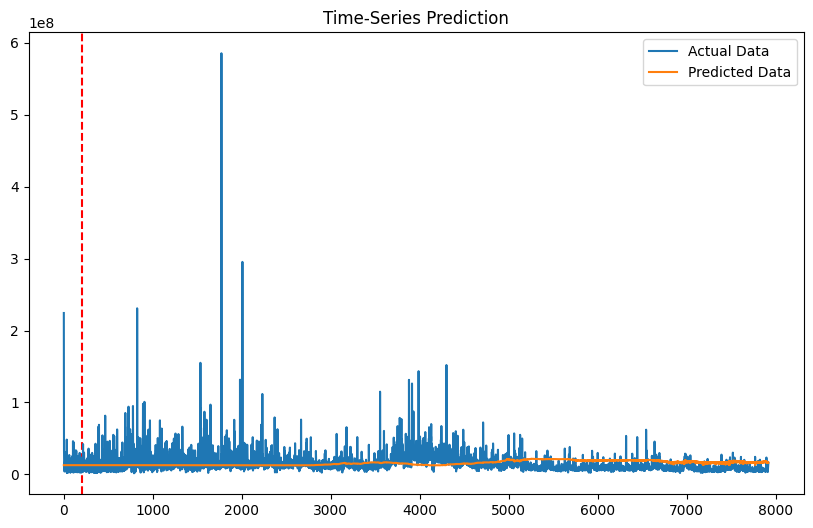

In [59]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()
label_y = df_y_ms.data.numpy()

predicted= ms.inverse_transform(predicted)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6))
plt.axvline(x=200, c='r', linestyle='--')

plt.plot(label_y, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()